<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [8]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [9]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [10]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [3]:
df = pd.read_csv("/Users/muhammaddaud/Downloads/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


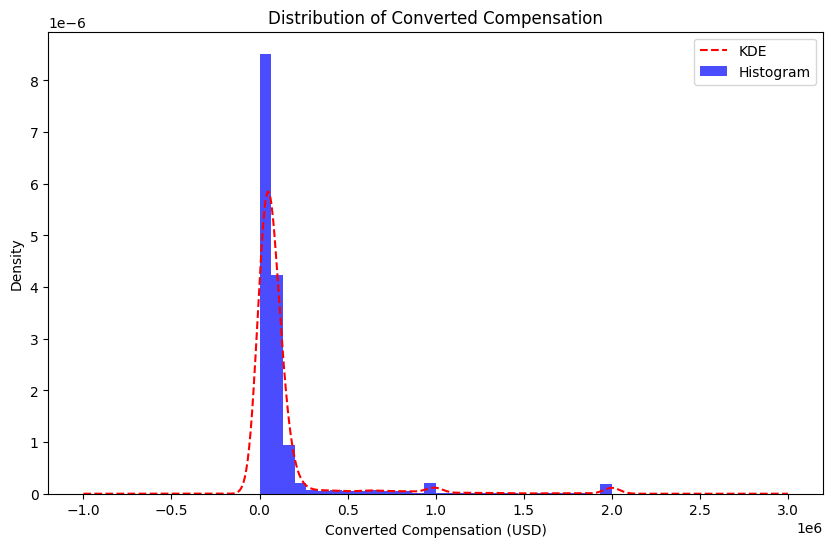

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, alpha=0.7, color='blue')  # Histogram
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)

# Adding a distribution curve (KDE - Kernel Density Estimation)
df['ConvertedComp'].plot(kind='kde', color='red', linestyle='--')

plt.legend(['KDE', 'Histogram'])
plt.show()

Plot the histogram for the column `ConvertedComp`.


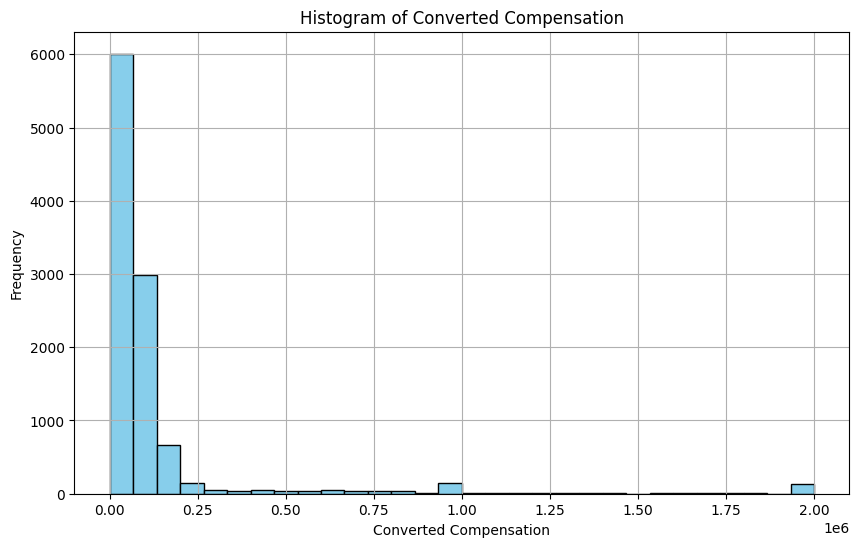

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
median_converted_comp = df['ConvertedComp'].median()

print("Median of ConvertedComp column:", median_converted_comp)

Median of ConvertedComp column: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
male_responders = df[df['Gender'] == 'Man']

# Count the number of responders who identified themselves only as 'Man'
num_male_responders = len(male_responders)

print("Number of responders who identified only as 'Man':", num_male_responders)

Number of responders who identified only as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Filter the dataset for responders who identified themselves as 'Woman'
female_responders = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for responders identified only as 'Woman'
median_converted_comp_woman = female_responders['ConvertedComp'].median()

print("Median ConvertedComp of responders identified only as 'Woman':", median_converted_comp_woman)

Median ConvertedComp of responders identified only as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

print("Five-number summary for the column 'Age':")
print("Min:", min_age)
print("Q1:", q1_age)
print("Median:", median_age)
print("Q3:", q3_age)
print("Max:", max_age)

Five-number summary for the column 'Age':
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


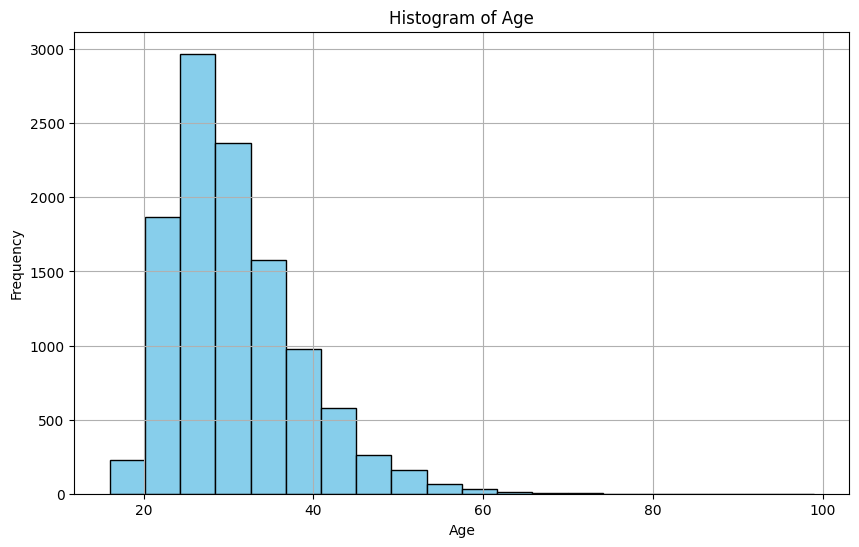

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


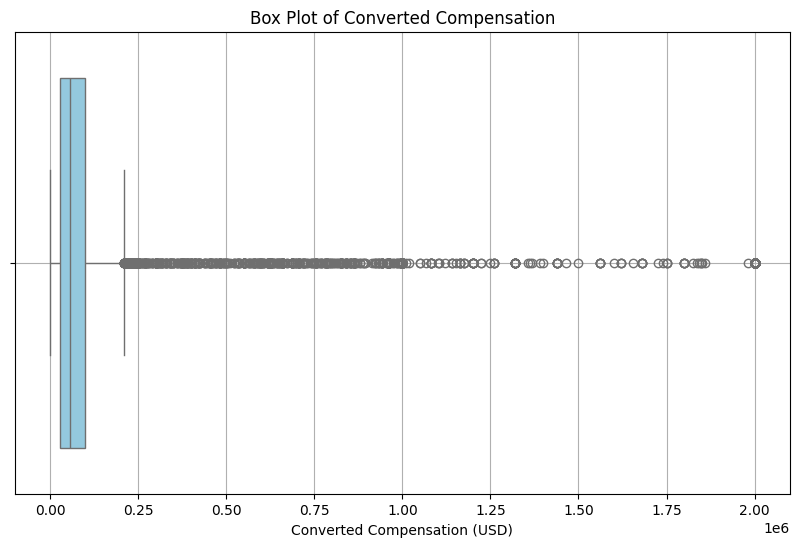

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='skyblue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# Q1
q1 = df['ConvertedComp'].quantile(0.25)
# Q3
q3 = df['ConvertedComp'].quantile(0.75)

# IQR
iqr = q3 - q1
print("Interquartile Range (IQR) for the column 'ConvertedComp':", iqr)

Interquartile Range (IQR) for the column 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [13]:
# Calculate the upper bound
upper_bound = q3 + 1.5 * iqr

# Calculate the lower bound
lower_bound = q1 - 1.5 * iqr

print("Upper Bound for potential outliers:", upper_bound)
print("Lower Bound for potential outliers:", lower_bound)

Upper Bound for potential outliers: 209698.0
Lower Bound for potential outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print("Number of outliers in the 'ConvertedComp' column:", num_outliers)

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [15]:
# Create a new dataframe by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new dataframe
print("New dataframe without outliers:")
print(df_no_outliers)

New dataframe without outliers:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# Calculate the correlation between 'Age' and all other numerical columns
correlation = df.corr()['Age']

# Print the correlation values
print("Correlation between 'Age' and other numerical columns:")
print(correlation)

<ipython-input-47-1983edfbf5f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Age']


Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
